In [1]:
from pyarc import CBA
from pyarc.algorithms import generateCARs, M1Algorithm, M2Algorithm
from pyarc.algorithms import createCARs

from pyarc import TransactionDB

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from itertools import combinations

import itertools
import pandas as pd
import numpy
import re

In [2]:
movies = pd.read_csv("data/movies.csv", sep=";")
movies_discr = movies.copy(True)

In [3]:
movies_discr.head()

,estimated-budget,a-list-celebrities,class
0,160,1,box-office-bomb
1,55,2,box-office-bomb
2,78,1,box-office-bomb
3,66,3,box-office-bomb
4,223,2,box-office-bomb


In [4]:
movies_discr["class"].unique()

array(['box-office-bomb', 'main-stream-hit', 'critical-success'],
      dtype=object)

In [ ]:
# Generate the ranges in order to convert the continious values in 

In [5]:
budget_bins = range(0, 350, 50)
budget_bins_names = [ "<{0};{1})".format(i, i + 50) for i in budget_bins[:-1] ]

In [6]:
budget_bins_names

['<0;50)', '<50;100)', '<100;150)', '<150;200)', '<200;250)', '<250;300)']

In [7]:
celebrities_bins = range(0, 10, 2)
celebrities_bins_names = [ "<{0};{1})".format(i, i + 2) for i in celebrities_bins[:-1] ]


In [8]:
celebrities_bins_names

['<0;2)', '<2;4)', '<4;6)', '<6;8)']

In [9]:
movies_discr['estimated-budget'] = pd.cut(movies['estimated-budget'], budget_bins, labels=budget_bins_names)


In [10]:
movies_discr['a-list-celebrities'] = pd.cut(movies['a-list-celebrities'], celebrities_bins, labels=celebrities_bins_names)

In [11]:
movies_discr.head()

,estimated-budget,a-list-celebrities,class
0,<150;200),<0;2),box-office-bomb
1,<50;100),<0;2),box-office-bomb
2,<50;100),<0;2),box-office-bomb
3,<50;100),<2;4),box-office-bomb
4,<200;250),<0;2),box-office-bomb


In [12]:
movies_discr.to_csv("data/movies_discr.csv", sep=";")

transactionDB = TransactionDB.from_DataFrame(movies_discr, unique_transactions=True)

In [13]:
transactionDB

[['estimated-budget:=:<150;200)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estimated-budget:=:<50;100)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estimated-budget:=:<50;100)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estimated-budget:=:<50;100)', 'a-list-celebrities:=:<2;4)', 'class:=:box-office-bomb'], ['estimated-budget:=:<200;250)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estimated-budget:=:<150;200)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estimated-budget:=:<0;50)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estimated-budget:=:<200;250)', 'a-list-celebrities:=:<2;4)', 'class:=:box-office-bomb'], ['estimated-budget:=:<150;200)', 'a-list-celebrities:=:<2;4)', 'class:=:box-office-bomb'], ['estimated-budget:=:<100;150)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estimated-budget:=:<0;50)', 'a-list-celebrities:=:<0;2)', 'class:=:box-office-bomb'], ['estim

In [14]:
rules = generateCARs(transactionDB, support=5, confidence=50) # reason to check for support and confidence


In [15]:
len(rules)

15

In [16]:
rules

[CAR {a-list-celebrities=<0;2)} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 13,
 CAR {estimated-budget=<0;50),a-list-celebrities=<0;2)} => {class=box-office-bomb} sup: 0.11 conf: 1.00 len: 3, id: 7,
 CAR {estimated-budget=<50;100),a-list-celebrities=<0;2)} => {class=box-office-bomb} sup: 0.09 conf: 1.00 len: 3, id: 12,
 CAR {estimated-budget=<250;300)} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 0,
 CAR {a-list-celebrities=<0;2),estimated-budget=<150;200)} => {class=box-office-bomb} sup: 0.06 conf: 1.00 len: 3, id: 5,
 CAR {estimated-budget=<0;50),a-list-celebrities=<4;6)} => {class=critical-success} sup: 0.06 conf: 1.00 len: 3, id: 6,
 CAR {estimated-budget=<200;250)} => {class=box-office-bomb} sup: 0.06 conf: 0.67 len: 2, id: 1,
 CAR {estimated-budget=<50;100),a-list-celebrities=<4;6)} => {class=critical-success} sup: 0.06 conf: 0.67 len: 3, id: 10,
 CAR {estimated-budget=<0;50)} => {class=box-office-bomb} sup: 0.14 conf: 0.62 len: 2, id: 8,
 CAR {a-li

In [17]:
movies_vals = movies.get_values()


x = range(0, 350, 50)
y = range(1, 9)

x_points = list(map(lambda n: n[0], movies_vals))
y_points = list(map(lambda n: n[1], movies_vals))
data_class = list(movies['class'])
appearance = {
    'box-office-bomb': ('brown', "o"),
    'main-stream-hit': ('blue', "o"),
    'critical-success': ('green', "o")
}
rule_appearance = {
    'box-office-bomb': 'tan',
    'main-stream-hit': 'aqua',
    'critical-success': 'lightgreen'
}


plt.style.use('seaborn-white')
rules

len(transactionDB)

35

In [18]:
def plot_rule(rule, plt):
    interval_regex = "<(\d+);(\d+)\)"
    
    lower_y = 0
    area_y = celebrities_bins[-1]
    
    lower_x = 0
    area_x = budget_bins[-1]
    
    
    
    
    if len(rule.antecedent) != 0:
        if rule.antecedent[0][0] == "a-list-celebrities":
            y = rule.antecedent[0]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[0]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
        
    if len(rule.antecedent) > 1:
        if rule.antecedent[1][0] == "a-list-celebrities":
            y = rule.antecedent[1]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[1]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
            
    
    axis = plt.gca()

    class_name = rule.consequent[1]
    
    axis.add_patch(
       patches.Rectangle((lower_x, lower_y), area_x, area_y, zorder=-2, facecolor=rule_appearance[class_name], alpha=rule.confidence)
    )

rule count 15


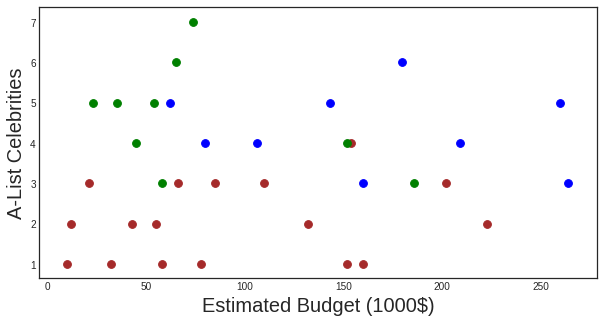

In [19]:
plt.figure(figsize=(10, 5))

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


    
plt.xlabel('Estimated Budget (1000$)', fontsize=20)
plt.ylabel('A-List Celebrities', fontsize=20)



plt.savefig("data/datacases.png")

print("rule count", len(rules))

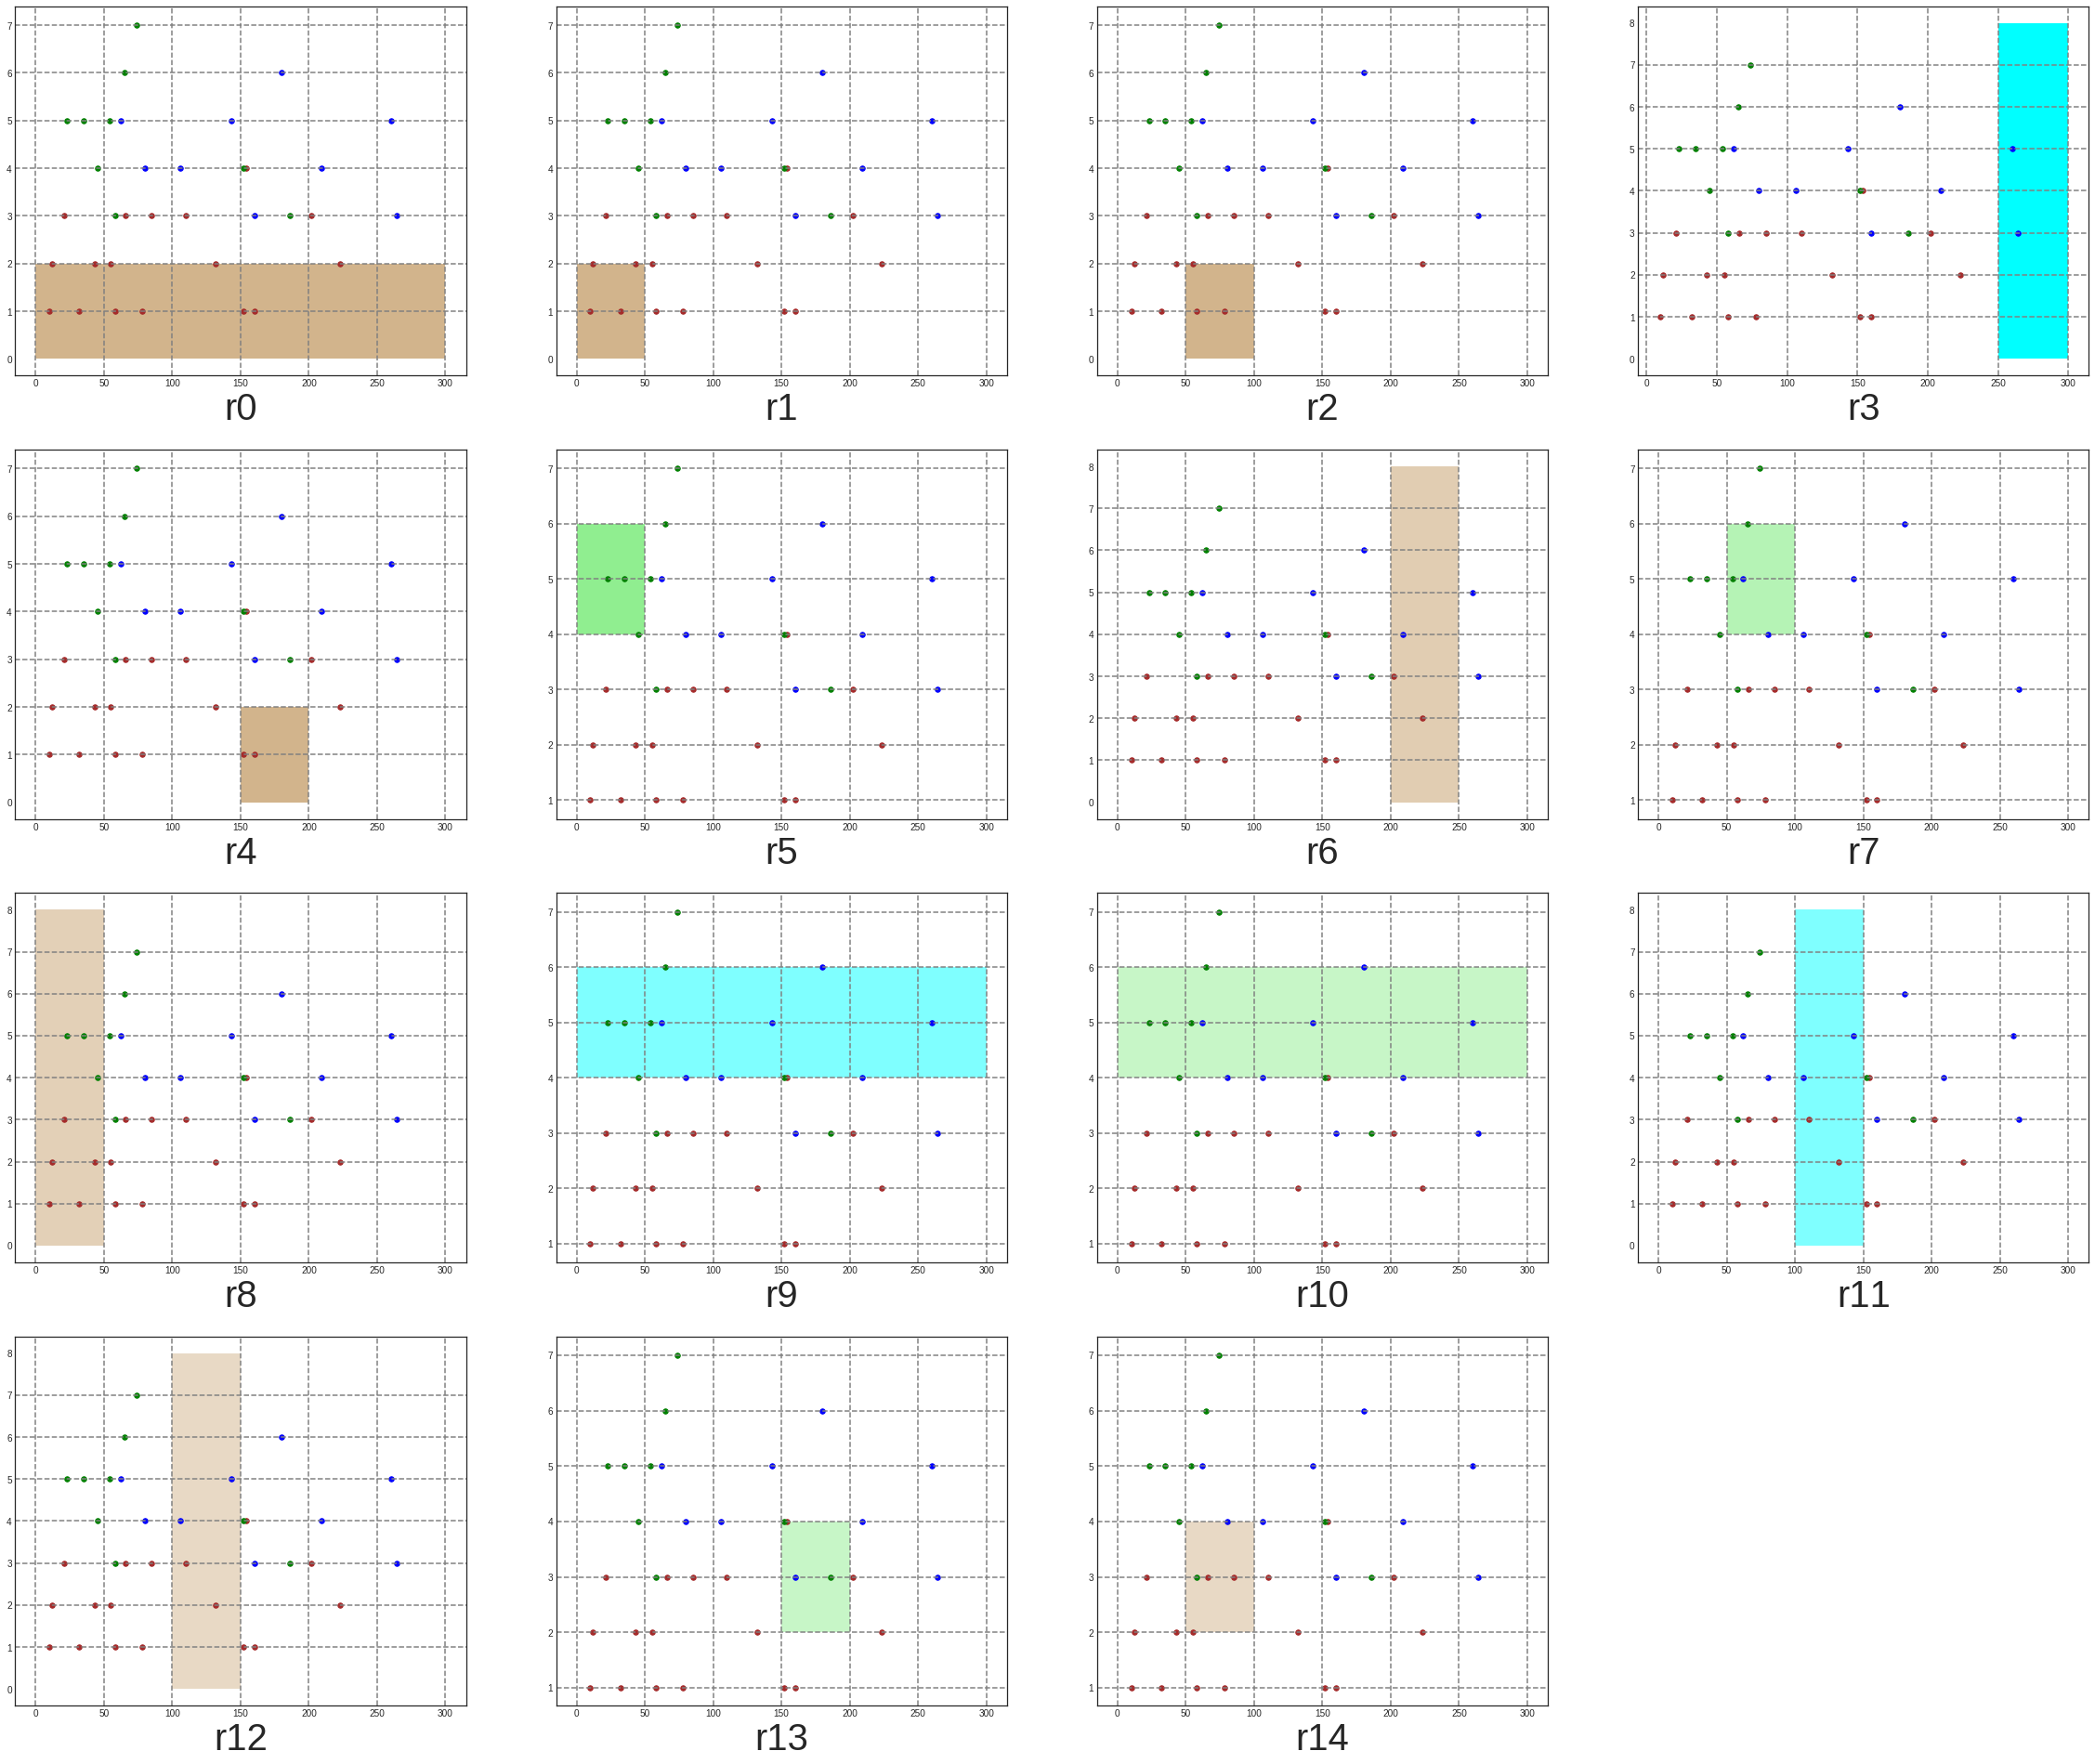

In [20]:
subplot_count = 1
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize=(40, 60))

ax.set_xlabel('Estimated Budget (1000$)')
ax.set_ylabel('A-List Celebrities')

for idx, r in enumerate(sorted(rules, reverse=True)):
    plt.subplot(7, 4, idx + 1)
    plot_rule(r, plt)
    
    # data cases
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=30)

    # rule boundary lines
    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
        
        
    plt.xlabel("r{}".format(idx), fontsize=40)
        
        
plt.savefig("data/rule_plot.png")

In [21]:
print(len(transactionDB))
clfm1 = M1Algorithm(rules, transactionDB).build()
print(len(clfm1.rules))
clfm1 = M1Algorithm(rules, transactionDB).build()
print(len(clfm1.rules))
clfm1 = M1Algorithm(rules, transactionDB).build()
print(len(clfm1.rules))

35
10
10
10


In [22]:
clfm1.rules

[CAR {a-list-celebrities=<0;2)} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 13,
 CAR {estimated-budget=<250;300)} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 0,
 CAR {estimated-budget=<0;50),a-list-celebrities=<4;6)} => {class=critical-success} sup: 0.06 conf: 1.00 len: 3, id: 6,
 CAR {estimated-budget=<200;250)} => {class=box-office-bomb} sup: 0.06 conf: 0.67 len: 2, id: 1,
 CAR {estimated-budget=<50;100),a-list-celebrities=<4;6)} => {class=critical-success} sup: 0.06 conf: 0.67 len: 3, id: 10,
 CAR {estimated-budget=<0;50)} => {class=box-office-bomb} sup: 0.14 conf: 0.62 len: 2, id: 8,
 CAR {a-list-celebrities=<4;6)} => {class=main-stream-hit} sup: 0.11 conf: 0.50 len: 2, id: 9,
 CAR {estimated-budget=<100;150)} => {class=main-stream-hit} sup: 0.06 conf: 0.50 len: 2, id: 2,
 CAR {a-list-celebrities=<2;4),estimated-budget=<150;200)} => {class=critical-success} sup: 0.06 conf: 0.50 len: 3, id: 4,
 CAR {estimated-budget=<50;100),a-list-celebrities=<2;4)} 

Text(0, 0.5, 'A-List Celebrities')

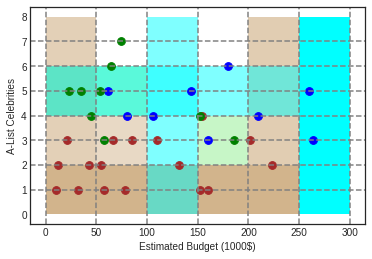

In [23]:
clf = M1Algorithm(rules, transactionDB).build()

for r in clf.rules:
    plot_rule(r, plt)

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


# rule boundary lines
for i, n in enumerate(x):
    plt.axhline(y=y[i], color = "grey", linestyle="dashed")
    plt.axvline(x=x[i], color = "grey", linestyle="dashed")

    
    
plt.xlabel('Estimated Budget (1000$)')
plt.ylabel('A-List Celebrities')

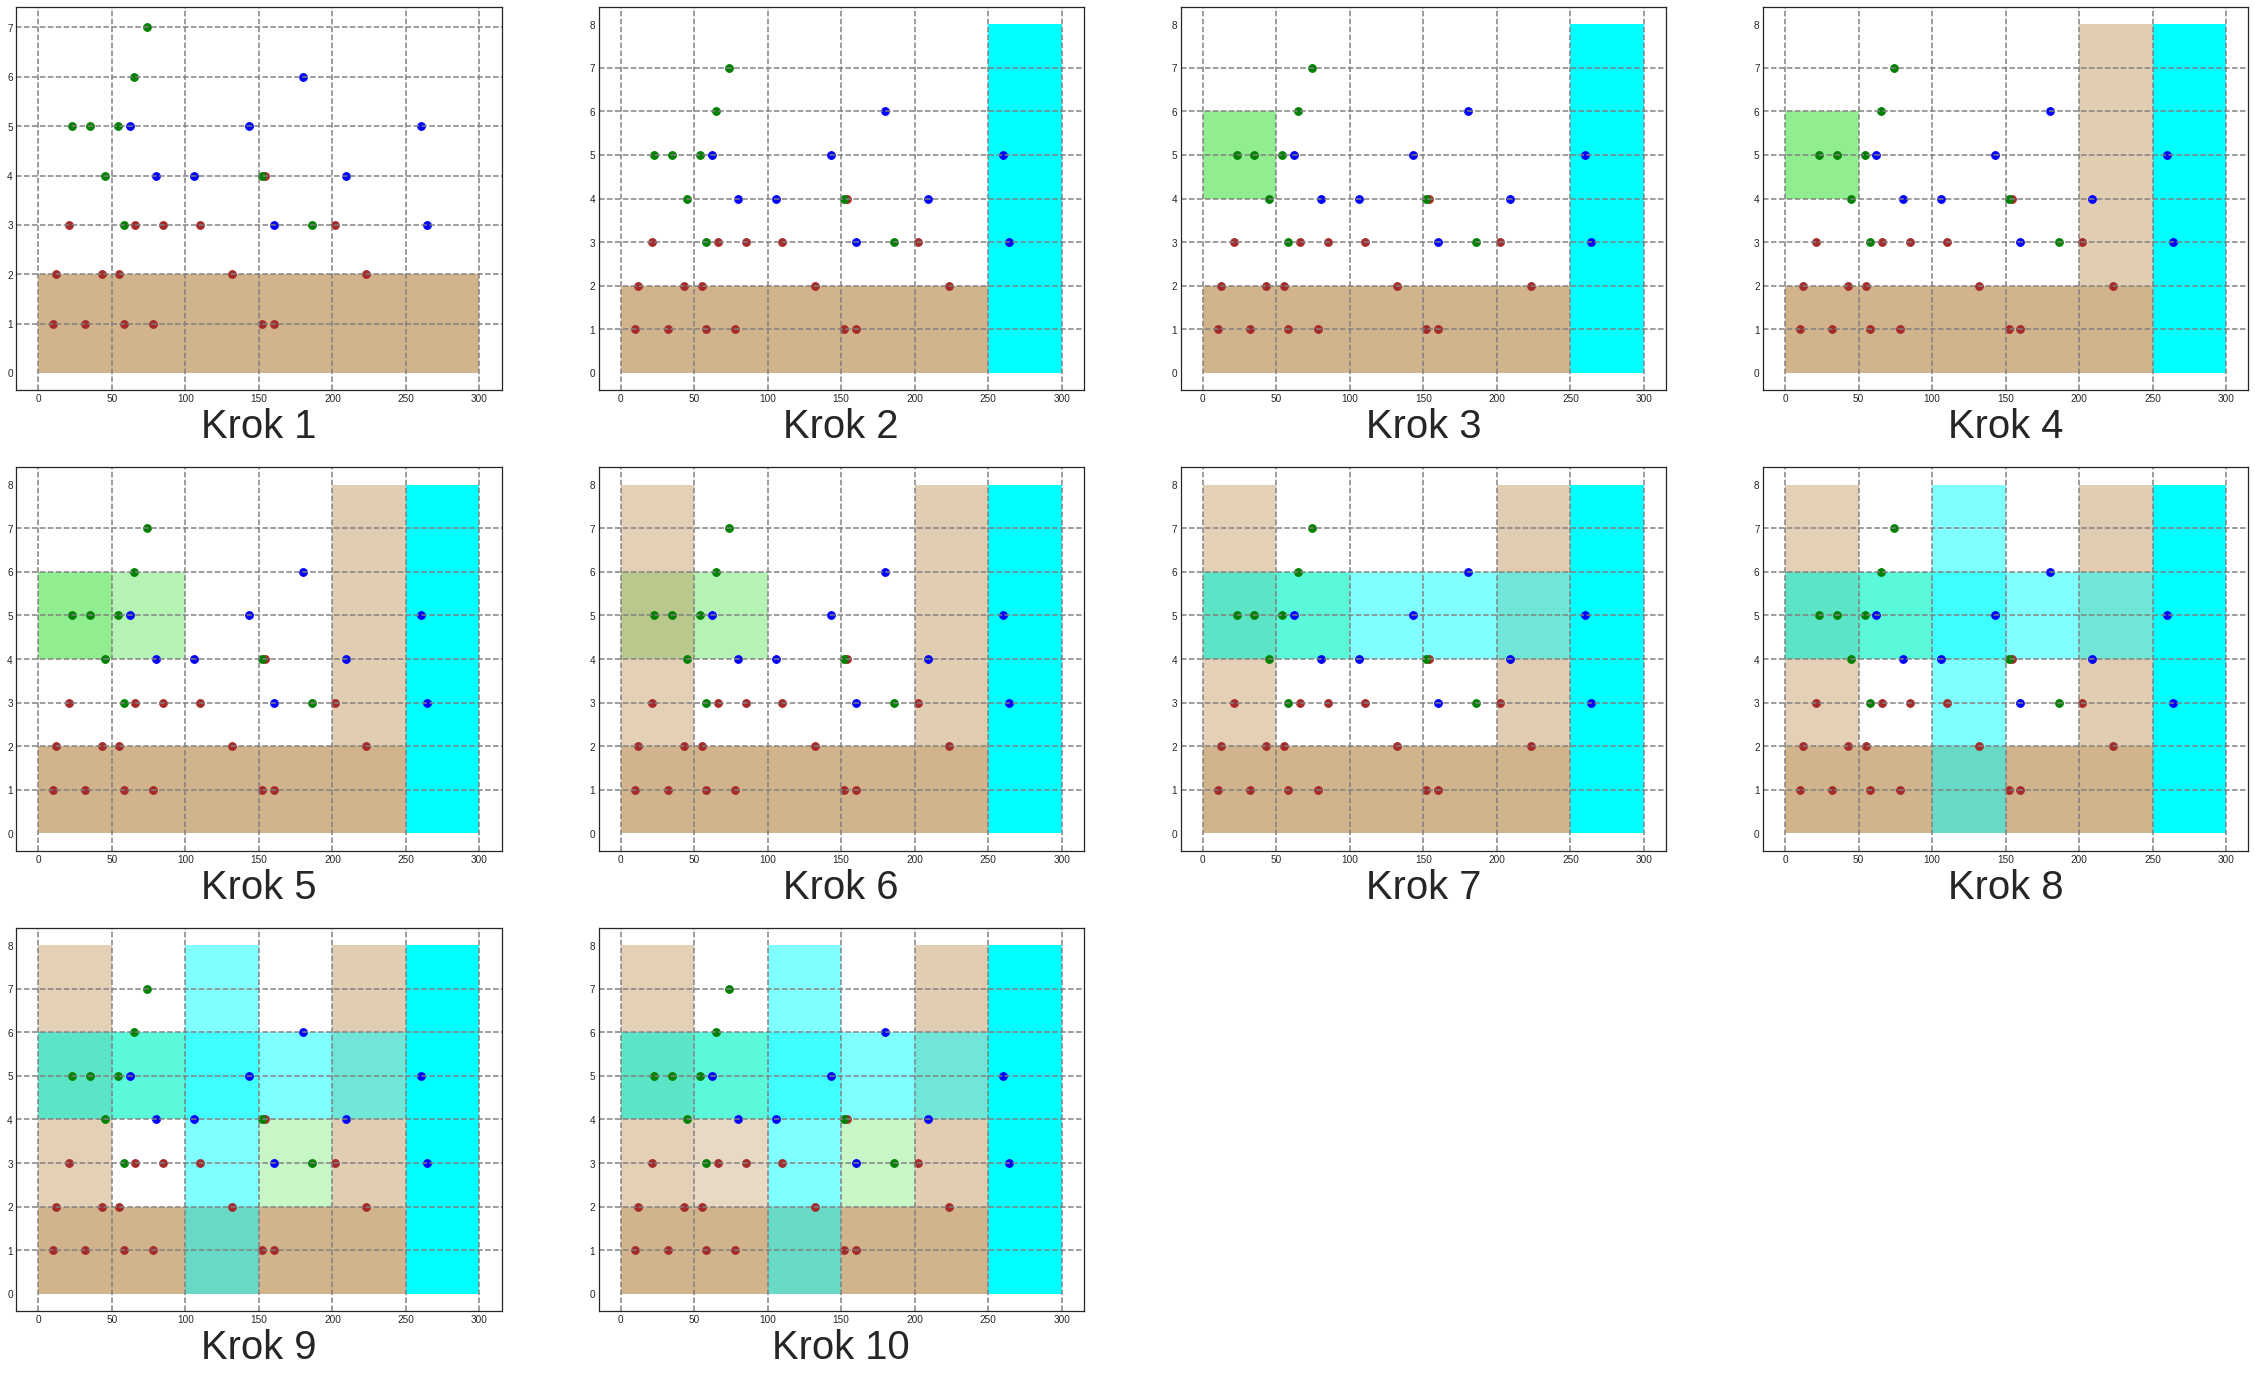

In [24]:
clfm1 = M1Algorithm(rules, transactionDB).build()

fig, ax = plt.subplots(figsize=(40, 24))
for idx, r in enumerate(clfm1.rules):
    plt.subplot(3, 4, idx + 1)
    
    for rule in clfm1.rules[:idx+1]:
        plot_rule(rule, plt)
        
    #plot_rule(r, plt)
    
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)

    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
    
    plt.xlabel("Krok {}".format(idx + 1), fontsize=40)
    
    
    
plt.savefig("data/m1_rules.png")

In [25]:
len(clfm1.rules)

10

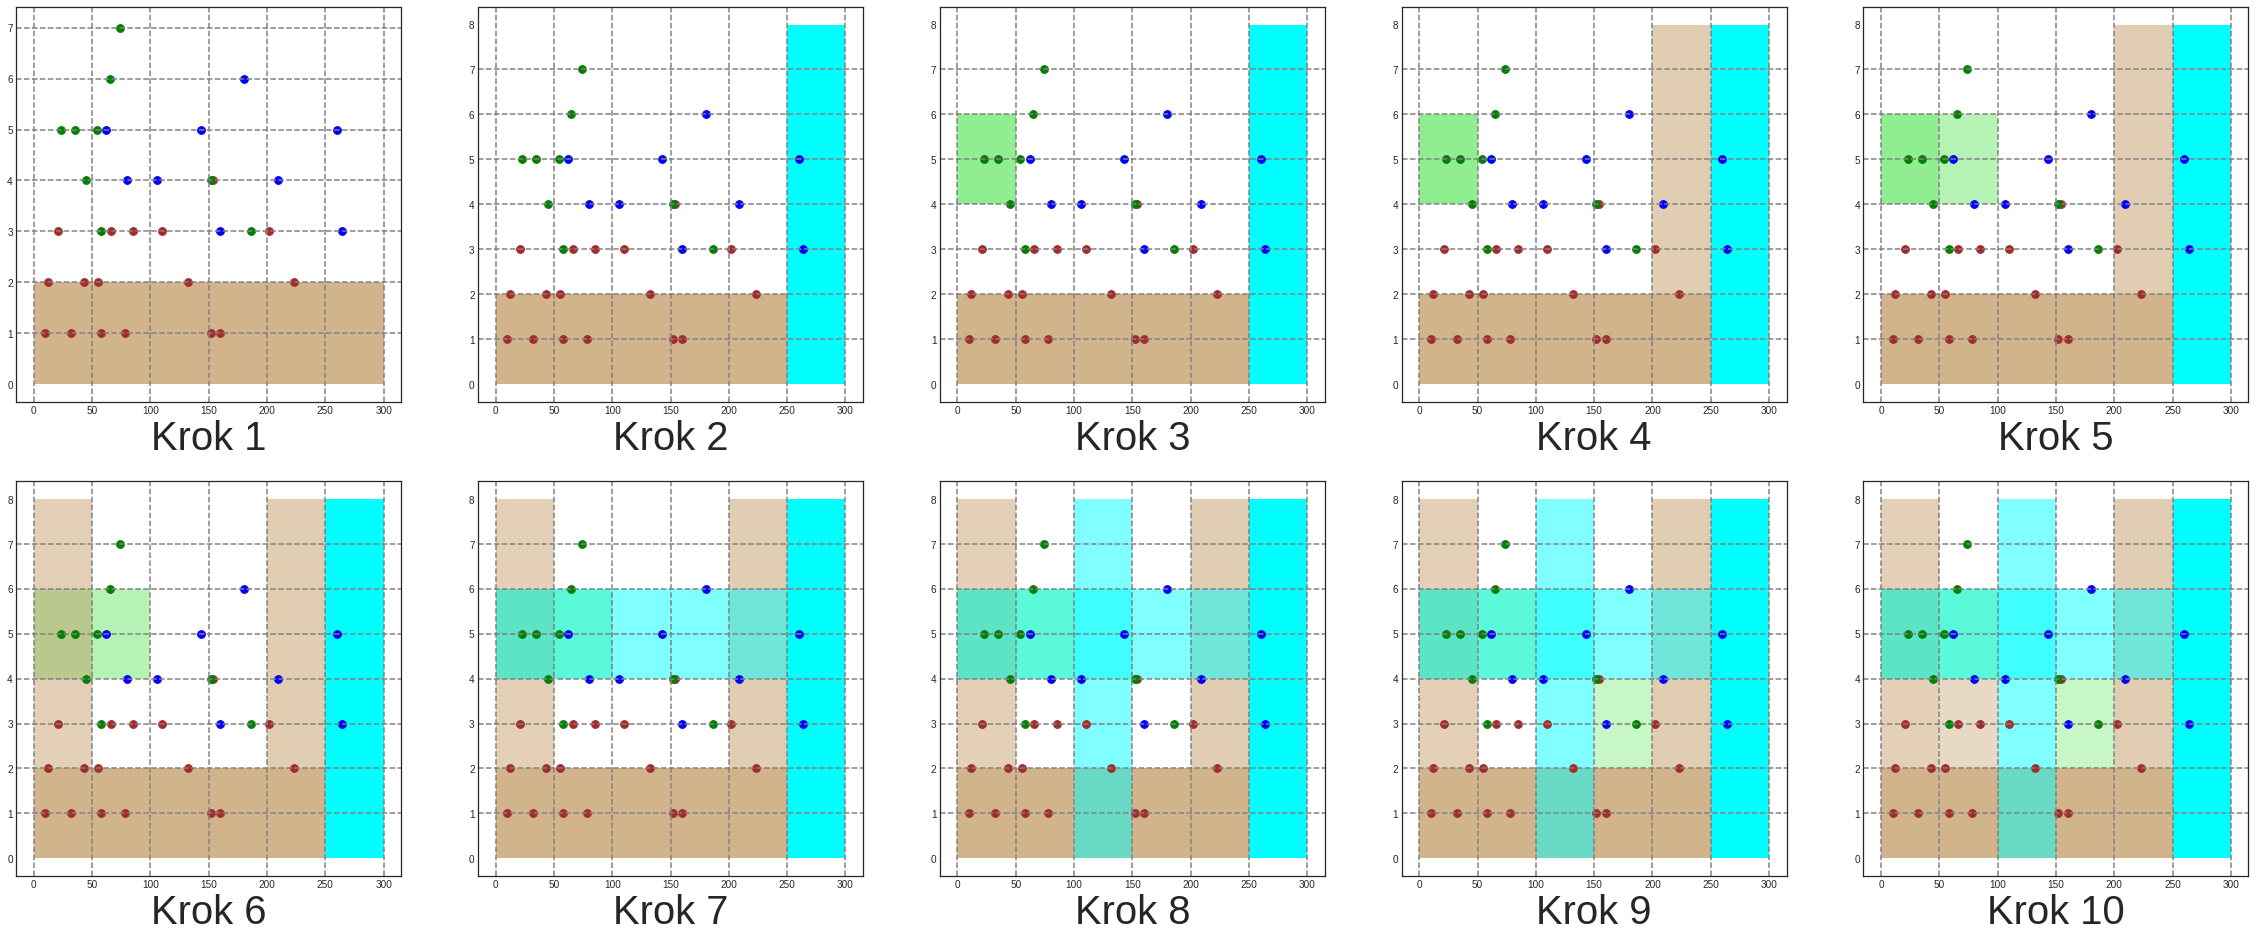

In [26]:

m2 = M2Algorithm(rules, transactionDB)
clfm2 = m2.build()


fig, ax = plt.subplots(figsize=(40, 16))
for idx, r in enumerate(clfm2.rules):
    plt.subplot(2, 5, idx + 1)
    
    for rule in clfm2.rules[:idx+1]:
        plot_rule(rule, plt)
    
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)

    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
    
    plt.xlabel("Krok {}".format(idx + 1), fontsize=40)
    
    
    
plt.savefig("data/m2_rules.png")

In [27]:
len(clfm2.rules)

10

In [28]:
import sklearn.metrics as skmetrics

m1pred = clfm1.predict_all(transactionDB)
m2pred = clfm2.predict_all(transactionDB)

actual = transactionDB.classes


m1acc = skmetrics.accuracy_score(m1pred, actual)
m2acc = skmetrics.accuracy_score(m2pred, actual)


print("m1 acc", m1acc)
print("m2 acc", m2acc)

m1 acc 0.7714285714285715
m2 acc 0.7714285714285715
